## AYKIRI DEĞERİ YAKALAMAK

In [12]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("/water_potability.csv")
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()

In [13]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [ ]:
df_turbidity = df["Turbidity"]

In [ ]:
df_turbidity

3       4.628771
4       4.075075
5       2.559708
6       2.672989
7       4.401425
          ...   
3267    4.613843
3268    3.442983
3269    4.369264
3270    3.669712
3271    4.435821
Name: Turbidity, Length: 2011, dtype: float64

<Axes: xlabel='Turbidity'>

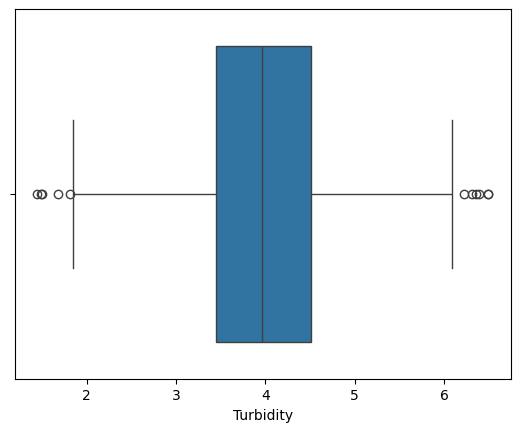

In [ ]:
sns.boxplot(x = df_turbidity)

In [ ]:
Q1=df_turbidity.quantile(0.25)
Q3=df_turbidity.quantile(0.75)
IQR=Q3-Q1

In [ ]:
IQR

1.0712598991969076

In [ ]:
Q1

3.4429154274276828

In [ ]:
Q3

4.51417532662459

In [ ]:
alt_sinir=Q1 - 1.5*IQR
ust_sinir= Q3 + 1.5*IQR

In [ ]:
alt_sinir

1.8360255786323214

In [ ]:
ust_sinir

6.121065175419952

In [ ]:
(df_turbidity > ust_sinir) | (df_turbidity < alt_sinir)

3       False
4       False
5       False
6       False
7       False
        ...  
3267    False
3268    False
3269    False
3270    False
3271    False
Name: Turbidity, Length: 2011, dtype: bool

In [ ]:
aykırı_tf = ((df_turbidity > ust_sinir) | (df_turbidity < alt_sinir))

In [ ]:
aykırı_tf.head()

3    False
4    False
5    False
6    False
7    False
Name: Turbidity, dtype: bool

In [ ]:
df_turbidity[aykırı_tf]

382     6.494249
593     1.680554
789     1.812529
990     6.357439
1073    6.389161
1290    1.496101
1892    1.492207
2377    6.226580
2757    6.307678
2921    6.494749
3042    1.450000
Name: Turbidity, dtype: float64

In [ ]:
df_turbidity[aykırı_tf].index

Int64Index([382, 593, 789, 990, 1073, 1290, 1892, 2377, 2757, 2921, 3042], dtype='int64')

##AYKIRI DEĞERLERİ ÇÖZMEK

In [ ]:
df_turbidity[aykırı_tf]

382     6.494249
593     1.680554
789     1.812529
990     6.357439
1073    6.389161
1290    1.496101
1892    1.492207
2377    6.226580
2757    6.307678
2921    6.494749
3042    1.450000
Name: Turbidity, dtype: float64

#silme

In [ ]:
type(df_turbidity)

pandas.core.frame.DataFrame

In [ ]:
df_turbidity = pd.DataFrame(df_turbidity)

In [ ]:
df_turbidity.shape

(2011, 1)

In [ ]:
aykırı_tf = ((df_turbidity > ust_sinir) | (df_turbidity < alt_sinir))

In [ ]:
t_df = df_turbidity[~(aykırı_tf).any(axis = 1)]

In [ ]:
t_df.shape

(2000, 1)

#ortalama ile doldurma

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/water_potability.csv")
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()

In [ ]:
df_turbidity = df["Turbidity"]

In [ ]:
aykırı_tf = ((df_turbidity > ust_sinir) | (df_turbidity < alt_sinir))

In [ ]:
df_turbidity[aykırı_tf]

382     6.494249
593     1.680554
789     1.812529
990     6.357439
1073    6.389161
1290    1.496101
1892    1.492207
2377    6.226580
2757    6.307678
2921    6.494749
3042    1.450000
Name: Turbidity, dtype: float64

In [ ]:
df_turbidity.mean()

3.9697287992523864

In [ ]:
df_turbidity[aykırı_tf] = df_turbidity.mean()

In [ ]:
df_turbidity[aykırı_tf]

382     3.969729
593     3.969729
789     3.969729
990     3.969729
1073    3.969729
1290    3.969729
1892    3.969729
2377    3.969729
2757    3.969729
2921    3.969729
3042    3.969729
Name: Turbidity, dtype: float64

#baskılama yöntemi

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/water_potability.csv")
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [ ]:
df_turbidity = df["Turbidity"]

In [ ]:
aykırı_tf = ((df_turbidity > ust_sinir) | (df_turbidity < alt_sinir))

In [ ]:
df_turbidity[aykırı_tf]

382     6.494249
593     1.680554
789     1.812529
990     6.357439
1073    6.389161
1290    1.496101
1892    1.492207
2377    6.226580
2757    6.307678
2921    6.494749
3042    1.450000
Name: Turbidity, dtype: float64

In [ ]:
alt_sinir

1.8360255786323214

In [ ]:
df_turbidity[aykırı_tf] = alt_sinir

In [ ]:
df_turbidity[aykırı_tf]

382     1.836026
593     1.836026
789     1.836026
990     1.836026
1073    1.836026
1290    1.836026
1892    1.836026
2377    1.836026
2757    1.836026
2921    1.836026
3042    1.836026
Name: Turbidity, dtype: float64

## ÇOK DEĞİŞKENLİ AYKIRI GÖZLEM ANALİZİ

# local outlier factor

In [17]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("/water_potability.csv")
df = df.select_dtypes(include= ["float64","int64"])
df = df.dropna()


In [18]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [21]:
df.shape

(2011, 10)

In [19]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [26]:
new = LocalOutlierFactor(n_neighbors=30 , contamination=0.2)

In [27]:
new.fit_predict(df)

array([ 1,  1,  1, ..., -1,  1, -1])

In [30]:
df_scores = new.negative_outlier_factor_

In [31]:
df_scores[:20]

array([-0.99479078, -0.99008938, -1.01031739, -1.01408005, -0.9758319 ,
       -1.01113277, -0.98893678, -1.07711049, -1.07434876, -0.99403806,
       -0.99605699, -0.9867731 , -0.97816534, -0.97007831, -1.02286513,
       -0.98075582, -1.02240827, -0.98515098, -0.99094528, -0.99854829])

In [36]:
np.sort(df_scores)[:30]

array([-2.82685174, -2.71040399, -2.68017145, -2.45901709, -2.45037587,
       -2.38974956, -2.37978886, -2.12353219, -1.99111287, -1.76548773,
       -1.72588262, -1.63599649, -1.61942225, -1.60583168, -1.58047056,
       -1.56832172, -1.5622279 , -1.54445012, -1.53910805, -1.5309508 ,
       -1.51913303, -1.50996755, -1.46210299, -1.36627873, -1.36526756,
       -1.3581514 , -1.35712201, -1.34729217, -1.28640143, -1.2857813 ])

In [38]:
esik_deger = np.sort(df_scores)[24]

In [50]:
aykiri_tf = df_scores > esik_deger

In [51]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

# silme yöntemi

In [42]:
new_df = df[df_scores > esik_deger]

In [43]:
new_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


aykırı gözlemler

In [45]:
df[df_scores < esik_deger]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
216,7.086168,189.145378,4304.492483,3.615891,259.373322,400.904350,12.993012,63.902288,3.416540,0
458,8.692115,144.236358,2552.962804,9.202634,347.975137,517.427471,13.963421,42.388661,2.283475,0
556,9.049166,169.509254,4343.356611,5.780823,386.700463,471.925377,16.170628,62.722085,2.814001,0
572,8.805178,157.231982,4728.650671,8.848262,356.773638,299.279775,9.439925,61.640597,5.176205,0
1030,9.608534,231.340228,4544.841718,6.577834,300.922330,328.904494,11.789619,78.568182,3.042797,0
1068,3.344589,156.479927,55334.702799,8.530102,371.147770,485.631148,16.980610,69.622490,2.575141,0
1186,9.484703,122.906991,56351.396304,4.219711,219.553437,480.848063,13.533433,41.731219,4.132274,1
1353,11.534880,183.262261,4111.785432,7.416773,398.955345,475.255395,10.839796,69.420035,3.000096,0
1381,9.502857,175.585673,4466.257488,6.416459,370.851893,406.309854,13.754221,57.438275,4.237345,0
1537,7.381758,203.460302,1372.091043,11.129154,475.737460,361.342496,16.548438,55.132546,3.338022,1


# baskılama yöntemi

In [52]:
baski_deger = df[df_scores == esik_deger]

In [53]:
baski_deger

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3255,6.008974,225.080234,5100.094173,7.452236,336.119,325.134492,11.079952,36.341012,4.01234,1


In [54]:
aykirilar=df[~aykiri_tf]

In [55]:
aykirilar

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
216,7.086168,189.145378,4304.492483,3.615891,259.373322,400.904350,12.993012,63.902288,3.416540,0
458,8.692115,144.236358,2552.962804,9.202634,347.975137,517.427471,13.963421,42.388661,2.283475,0
556,9.049166,169.509254,4343.356611,5.780823,386.700463,471.925377,16.170628,62.722085,2.814001,0
572,8.805178,157.231982,4728.650671,8.848262,356.773638,299.279775,9.439925,61.640597,5.176205,0
1030,9.608534,231.340228,4544.841718,6.577834,300.922330,328.904494,11.789619,78.568182,3.042797,0
1068,3.344589,156.479927,55334.702799,8.530102,371.147770,485.631148,16.980610,69.622490,2.575141,0
1186,9.484703,122.906991,56351.396304,4.219711,219.553437,480.848063,13.533433,41.731219,4.132274,1
1353,11.534880,183.262261,4111.785432,7.416773,398.955345,475.255395,10.839796,69.420035,3.000096,0
1381,9.502857,175.585673,4466.257488,6.416459,370.851893,406.309854,13.754221,57.438275,4.237345,0
1537,7.381758,203.460302,1372.091043,11.129154,475.737460,361.342496,16.548438,55.132546,3.338022,1


In [56]:
res = aykirilar.to_records(index = False)

In [57]:
res

rec.array([( 7.0861684 , 189.14537768,  4304.49248309,  3.61589052, 259.37332177, 400.90434969, 12.99301224,  63.90228825, 3.41653975, 0),
           ( 8.69211532, 144.23635783,  2552.96280365,  9.20263394, 347.9751368 , 517.42747088, 13.96342114,  42.38866132, 2.28347516, 0),
           ( 9.04916605, 169.50925435,  4343.356611  ,  5.78082262, 386.70046325, 471.92537716, 16.17062839,  62.72208468, 2.81400068, 0),
           ( 8.80517775, 157.23198164,  4728.65067102,  8.84826222, 356.77363753, 299.27977469,  9.43992529,  61.64059674, 5.17620507, 0),
           ( 9.60853359, 231.34022824,  4544.84171758,  6.57783405, 300.92232973, 328.90449423, 11.78961929,  78.56818212, 3.04279694, 0),
           ( 3.34458853, 156.47992684, 55334.70279929,  8.53010158, 371.14777044, 485.63114781, 16.98060997,  69.62249007, 2.57514103, 0),
           ( 9.48470325, 122.90699076, 56351.39630372,  4.21971053, 219.5534368 , 480.84806347, 13.53343295,  41.73121923, 4.13227424, 1),
           (11.53488049, 18

In [58]:
res[:] = baski_deger.to_records(index = False)

In [59]:
res

rec.array([(6.00897361, 225.08023383, 5100.0941727, 7.45223619, 336.11899996, 325.13449217, 11.07995155, 36.34101183, 4.01234038, 1),
           (6.00897361, 225.08023383, 5100.0941727, 7.45223619, 336.11899996, 325.13449217, 11.07995155, 36.34101183, 4.01234038, 1),
           (6.00897361, 225.08023383, 5100.0941727, 7.45223619, 336.11899996, 325.13449217, 11.07995155, 36.34101183, 4.01234038, 1),
           (6.00897361, 225.08023383, 5100.0941727, 7.45223619, 336.11899996, 325.13449217, 11.07995155, 36.34101183, 4.01234038, 1),
           (6.00897361, 225.08023383, 5100.0941727, 7.45223619, 336.11899996, 325.13449217, 11.07995155, 36.34101183, 4.01234038, 1),
           (6.00897361, 225.08023383, 5100.0941727, 7.45223619, 336.11899996, 325.13449217, 11.07995155, 36.34101183, 4.01234038, 1),
           (6.00897361, 225.08023383, 5100.0941727, 7.45223619, 336.11899996, 325.13449217, 11.07995155, 36.34101183, 4.01234038, 1),
           (6.00897361, 225.08023383, 5100.0941727, 7.45223619

In [60]:
df[~aykiri_tf]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
216,7.086168,189.145378,4304.492483,3.615891,259.373322,400.904350,12.993012,63.902288,3.416540,0
458,8.692115,144.236358,2552.962804,9.202634,347.975137,517.427471,13.963421,42.388661,2.283475,0
556,9.049166,169.509254,4343.356611,5.780823,386.700463,471.925377,16.170628,62.722085,2.814001,0
572,8.805178,157.231982,4728.650671,8.848262,356.773638,299.279775,9.439925,61.640597,5.176205,0
1030,9.608534,231.340228,4544.841718,6.577834,300.922330,328.904494,11.789619,78.568182,3.042797,0
1068,3.344589,156.479927,55334.702799,8.530102,371.147770,485.631148,16.980610,69.622490,2.575141,0
1186,9.484703,122.906991,56351.396304,4.219711,219.553437,480.848063,13.533433,41.731219,4.132274,1
1353,11.534880,183.262261,4111.785432,7.416773,398.955345,475.255395,10.839796,69.420035,3.000096,0
1381,9.502857,175.585673,4466.257488,6.416459,370.851893,406.309854,13.754221,57.438275,4.237345,0
1537,7.381758,203.460302,1372.091043,11.129154,475.737460,361.342496,16.548438,55.132546,3.338022,1


In [61]:
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [62]:
df[~aykiri_tf]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
216,6.008974,225.080234,5100.094173,7.452236,336.119,325.134492,11.079952,36.341012,4.01234,1
458,6.008974,225.080234,5100.094173,7.452236,336.119,325.134492,11.079952,36.341012,4.01234,1
556,6.008974,225.080234,5100.094173,7.452236,336.119,325.134492,11.079952,36.341012,4.01234,1
572,6.008974,225.080234,5100.094173,7.452236,336.119,325.134492,11.079952,36.341012,4.01234,1
1030,6.008974,225.080234,5100.094173,7.452236,336.119,325.134492,11.079952,36.341012,4.01234,1
1068,6.008974,225.080234,5100.094173,7.452236,336.119,325.134492,11.079952,36.341012,4.01234,1
1186,6.008974,225.080234,5100.094173,7.452236,336.119,325.134492,11.079952,36.341012,4.01234,1
1353,6.008974,225.080234,5100.094173,7.452236,336.119,325.134492,11.079952,36.341012,4.01234,1
1381,6.008974,225.080234,5100.094173,7.452236,336.119,325.134492,11.079952,36.341012,4.01234,1
1537,6.008974,225.080234,5100.094173,7.452236,336.119,325.134492,11.079952,36.341012,4.01234,1
